In [10]:
# importando librerias necesarias
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

In [12]:
# antecedentes (entradas)
calidad = ctrl.Antecedent(np.arange(0, 11, 1), 'calidad')
servicio = ctrl.Antecedent(np.arange(0, 11, 1), 'servicio')

#consecuencias(salidas)
propina = ctrl.Consequent(np.arange(0, 26, 1), 'propina')

# funcion para agregar los posibles terminos de las variables difusas (low, medium, high = 3)

calidad.automf(3)
servicio.automf(3)

# se definen los universos de los terminos variables

propina['low'] = fuzz.trimf(propina.universe, [0, 0, 13])
propina['medium'] = fuzz.trimf(propina.universe, [0, 13, 25])
propina['high'] = fuzz.trimf(propina.universe, [13, 25, 25])

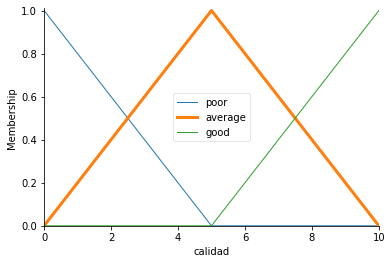

In [13]:
#ver promedio
calidad['average'].view()

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f46c53700b8>)

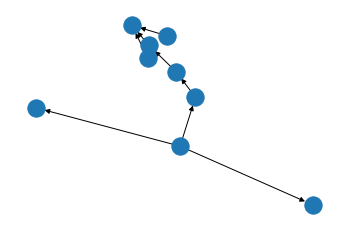

In [14]:
"""
Ahora se define la relación difusa entre las variables de entrada y salida.
para el ejemplo las reglas serian:
1- Si la comida es pobre:'poor' O el servicio es pobre entonces la propina sera baja
2- si el servicio es promedio:'average', entonces la propina será media
3- si la comida es buena:'good' O el servicio es bueno, entonces la propina sera alta
"""
regla1 = ctrl.Rule(calidad['poor'] | servicio['poor'], propina['low'])
regla2 = ctrl.Rule(servicio['average'], propina['medium'])
regla3 = ctrl.Rule(servicio['good'] | calidad['good'], propina['high'])

regla2.view()


In [15]:
# sistema de control de creación y simulación.

# creando el sistema de control a través de:

control_propinas = ctrl.ControlSystem([regla1, regla2, regla3])

In [16]:
# esto para que el objeto este aplicado a un conjunto especifico de circunstancias.
# dar propina a sharon en el local la cerveceria

propinas = ctrl.ControlSystemSimulation(control_propinas)

In [17]:
# ejemplo, calidad de comida de 6.5 y servicio de 9.8

propinas.input['calidad'] = 6.5
propinas.input['servicio'] = 9.8

propinas.compute()

19.847607361963192


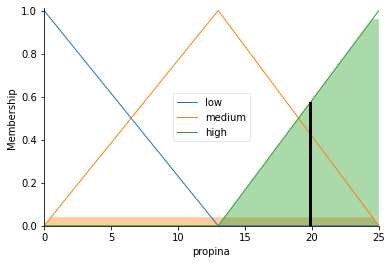

In [18]:
print (propinas.output['propina'])
propina.view(sim=propinas)